In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import requests
import io

mag = pd.read_csv("SDS_Mag.csv", index_col=0)
mag


,len,wid,size,conc,conc1,asym,m3long,m3trans,alp,dis,cls
1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
3,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
4,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
5,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
6,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
7,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
8,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
9,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
10,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [27]:
mag1 = pd.read_csv("SDS_Mag (1).csv", index_col=0)
mag1

,len,wid,size,conc,conc1,asym,m3long,m3trans,alp,dis,cls
1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
3,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
4,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
5,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
6,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
7,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
8,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
9,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,1
10,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1


In [6]:
train=mag.sample(frac=0.8,random_state=200)
test=mag.drop(train.index)

In [10]:
train.describe()

,len,wid,size,conc,conc1,asym,m3long,m3trans,alp,dis
count,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000
mean,53.431287,22.245799,2.827472,0.379438,0.214192,-4.168475,10.570717,0.235500,27.815120,193.540179
std,42.643539,18.410942,0.473868,0.182773,0.110493,59.685068,51.188556,20.863583,26.210682,74.830636
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-318.300200,-205.894700,0.000000,1.282600
25%,24.388200,11.884500,2.480000,0.235200,0.127900,-20.367625,-12.931000,-10.862575,5.601500,142.126000
50%,37.223550,17.162500,2.741250,0.353300,0.195700,3.906850,15.402450,0.855300,17.770000,191.526100
75%,70.173750,24.882200,3.104200,0.503200,0.285225,24.287100,36.053750,10.941400,46.219400,240.178250
max,334.177000,256.382000,5.323300,0.893000,0.675200,473.065400,238.321000,179.851000,90.000000,495.561000


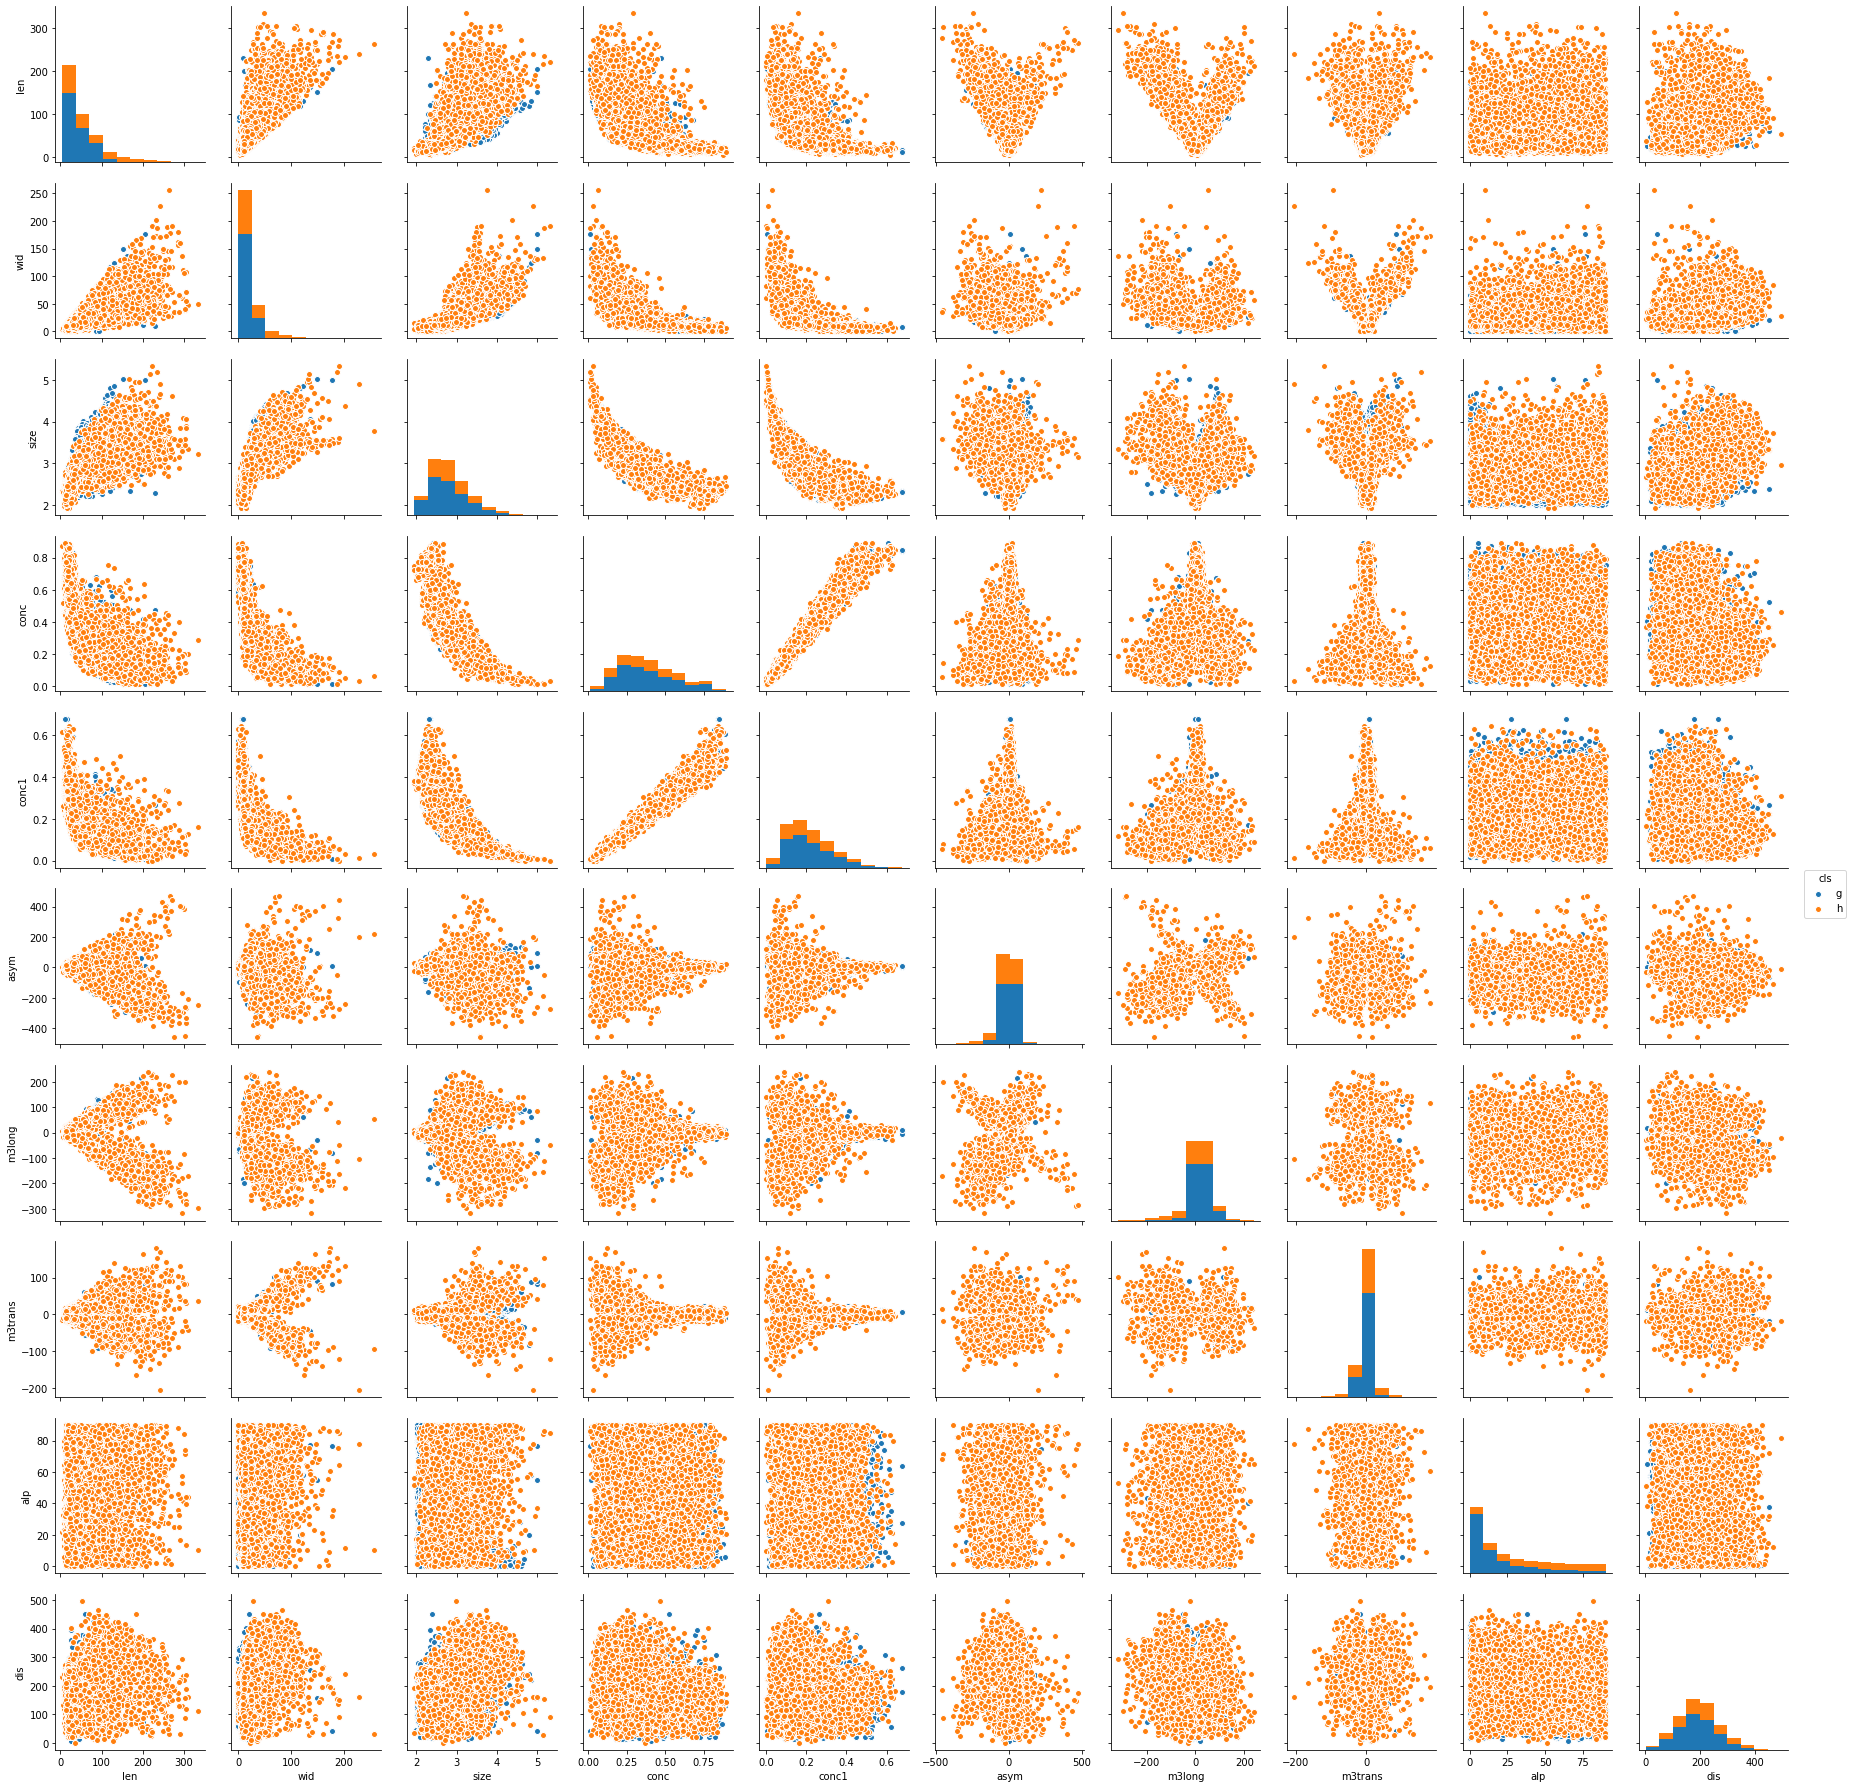

In [17]:
sns.pairplot(train, hue='cls')

<AxesSubplot:>

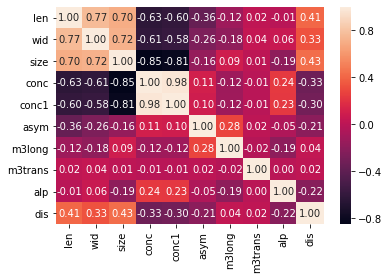

In [18]:
correlation_columns = train.columns.drop('cls')
sns.heatmap(train[correlation_columns].corr(), annot=True, fmt=".2f")

/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was d

array([[<AxesSubplot:title={'center':'alp'}>,
        <AxesSubplot:title={'center':'asym'}>,
        <AxesSubplot:title={'center':'conc'}>],
       [<AxesSubplot:title={'center':'conc1'}>,
        <AxesSubplot:title={'center':'dis'}>,
        <AxesSubplot:title={'center':'len'}>],
       [<AxesSubplot:title={'center':'m3long'}>,
        <AxesSubplot:title={'center':'m3trans'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'wid'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

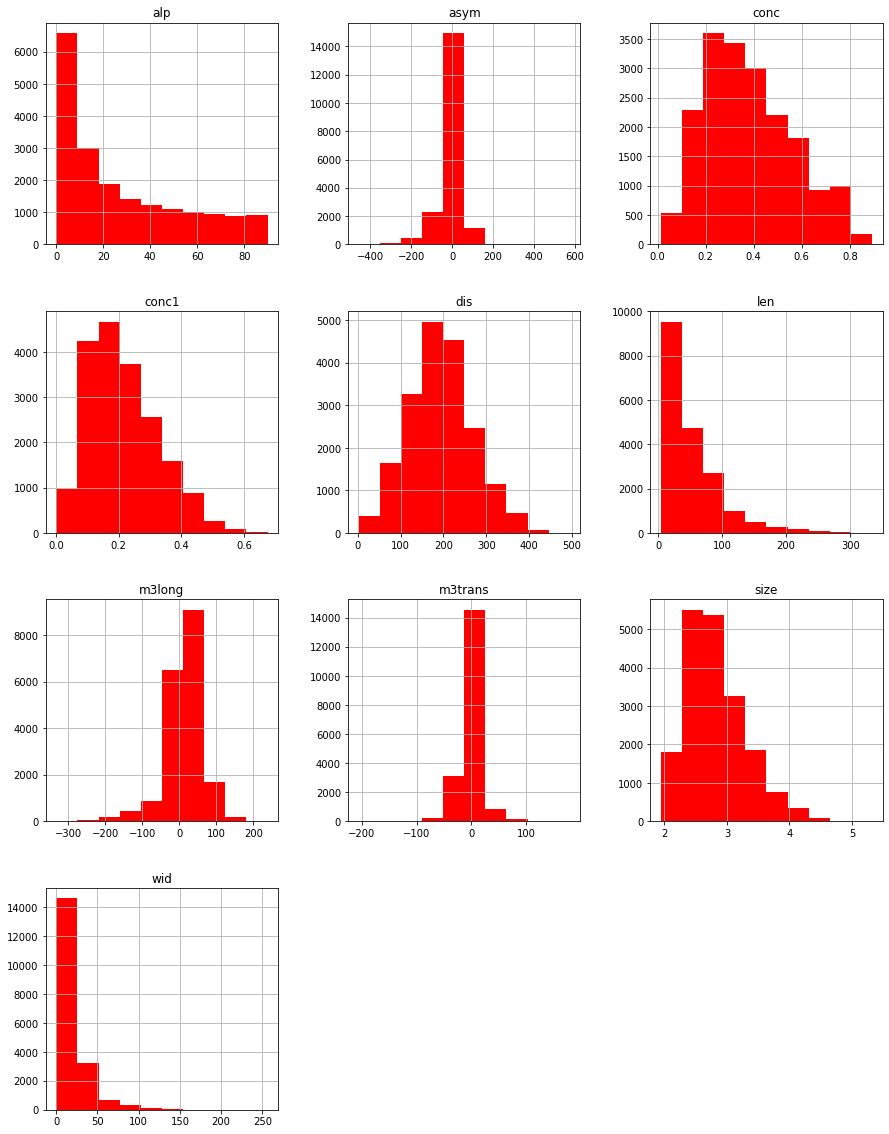

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
mag.hist(ax = ax, color = "red")

In [24]:
mag['cls'].value_counts()

g    12332
h     6688
Name: cls, dtype: int64

In [25]:
import matplotlib.pyplot as plt
labels = 'g =gamma ray','h =hadron (background)'
sizes = [12332, 6688]
colors = [ 'lightcoral', 'lightskyblue']

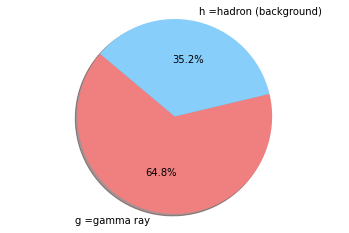

In [26]:
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()